In [7]:
%matplotlib inline

import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ripser import ripser
from persim import plot_diagrams
import warnings
warnings.filterwarnings('ignore')

from src.cocycles_linear_algebra import *
from src.local_PCA import *
from src.approx_cocycles import *
from src.linear_systems_modp import *
from src.cocycles_linear_algebra import *

In [8]:
# load the dataset

f = open('./data/lines.pckl', 'rb')
imgs = pickle.load(f)
f.close()

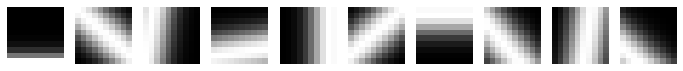

In [9]:
# display a few images
n = 10

_, axs = plt.subplots(1, n, figsize=(12, 12))
axs = axs.flatten()

for i in range(0,n) :
    axs[i].imshow(np.reshape(imgs[i],(10,10)), cmap='gray')
    axs[i].axis('off')
plt.show()

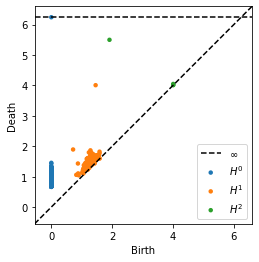

In [10]:
# compute persistence diagram and display it

ripser_out_z2 = ripser(imgs, coeff=2, do_cocycles = True, maxdim = 2)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$"])

In [11]:
# do local PCA to get an approximate local trivialization

components = local_pca(18, imgs, n_components = 2)

With 2 components, recover 0.8968397444107045 of the variance on averge.


In [12]:
# compute an approximate cocycle given by the local trivialization
# compute the homological death so that it is a 1-approximate cocycle and display the death time

dth = approx_cocycle_vr_death(imgs, components, tolerance = 1)
print(dth)

2.941667719774591


In [24]:
%%time

# compute the first Stiefel--Whitney classes of the cocycle
cocycle1 = approx_sw1_vr_from_local_bases(imgs, components, dth)

CPU times: user 290 ms, sys: 0 ns, total: 290 ms
Wall time: 287 ms


In [31]:
%%time

# compute the second Stiefel--Whitney classes of the cocycle
cocycle2 = approx_sw2_vr_from_local_bases(imgs, components, dth)

CPU times: user 3.95 s, sys: 0 ns, total: 3.95 s
Wall time: 3.93 s


In [15]:
# write the Stiefel--Whitney classes in the basis given by the persistent cohomology computation

dgm1 = dgmsz2[1]
a = matrix_from_vertices_gen_cocycle(imgs, ripser_out_z2['cocycles'][1], dgm1[:,1], cocycle1, dth)
sol1 = solve_system_mod(a, mod = 2)

dgm2 = dgmsz2[2]
b = matrix_from_edges_gen_cocycle(imgs, ripser_out_z2['cocycles'][2], dgm2[:,1], cocycle2, dth)
sol2 = solve_system_mod(b, mod=2)

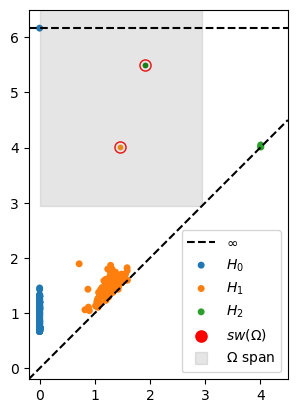

In [36]:
# display the persistence diagrams with the classes that sum to the Stiefel--Whitney classes highlighted

n_gens1 = len(ripser_out_z2['cocycles'][1])
appear1 = np.nonzero(sol1[:n_gens1])

n_gens2 = len(ripser_out_z2['cocycles'][2])
appear2 = np.nonzero(sol2[:n_gens2])


ax = plt.gca()
rect = patches.Rectangle((0, dth), dth, 1000, color="grey", alpha = 0.2)
ax.add_patch(rect)

plt.rcParams.update({'font.size' : 13})
plot_diagrams(dgmsz2, show = False, xy_range=[-0.2, 4.5, -0.2, 6.5], size = 25 )
ax.scatter(dgm1[appear1, 0], dgm1[appear1, 1], 65, 'r', 'o', label="$sw(\Omega)$")
ax.scatter(dgm1[appear1, 0], dgm1[appear1, 1], 35, 'w', 'o')
ax.scatter(dgm1[appear1, 0], dgm1[appear1, 1], 10, 'darkorange', 'o')
ax.scatter([],[], 65, 'grey', 's', alpha=0.2, label="$\Omega$ span")

ax.scatter(dgm2[appear2, 0], dgm2[appear2, 1], 65, 'r', 'o')
ax.scatter(dgm2[appear2, 0], dgm2[appear2, 1], 35, 'w', 'o')
ax.scatter(dgm2[appear2, 0], dgm2[appear2, 1], 10, 'g', 'o')


ax.legend()
ax.set_xlabel("")
ax.set_ylabel("")

plt.show()